In this project I explored Iris data set. This project involves building KNN algorithm to predict the variable Species and calculate its misclassification error.

In [2]:
head(iris) # head of the data frame

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
str(iris) # structure of the data frame

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [5]:
any(is.na(iris)) #checking for null values

[1] FALSE

In [6]:
#standardize the feature columns of the iris dataset
standardised.iris <- scale(iris[,-5])
head(standardised.iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


In [7]:
#checking the scale by looking whether at the variance
var(standardised.iris[,1])
var(standardised.iris[,2])

[1] 1

[1] 1

In [8]:
#joining the standardized data with the target column
finaldata<- cbind(standardised.iris, iris[5])

In [9]:
head(finaldata)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


In [11]:
#Splitting dataset into train and test
library(caTools)
set.seed(2)
split<- sample.split(finaldata$Species, SplitRatio = 0.7)
train_data<- subset(finaldata, split==TRUE)
test_data<- subset(finaldata, split==FALSE)

In [12]:
#installing class package
install.packages("class")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [13]:
library(class)

In [14]:
#predicting values using test data
predicted.species <- knn(train_data[1:4],test_data[1:4],train_data$Species,k=1)
head(predicted.species)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

In [15]:
#misclassification error
misclasserror<- mean(train_data$Species!=predicted.species)
print(misclasserror)

Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in `!=.default`(train_data$Species, predicted.species):
“longer object length is not a multiple of shorter object length”

[1] 0.6190476


In [17]:
# misclassification error for k values- 1 to 10
predicted.species<- NULL
error.rate<- NULL
for (i in 1:10){
  set.seed(2)
 predicted.species<- knn(train_data[1:4],test_data[1:4],train_data$Species,k=i)
 error.rate[i]<- mean(train_data$Species!=predicted.species)
}

print(error.rate)

Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in `!=.default`(train_data$Species, predicted.species):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in `!=.default`(train_data$Species, predicted.species):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in `!=.default`(train_data$Species, predicted.species):
“longer object length is not a multiple of shorter object length”Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”Warning message in `!=.default`(train_data$Species, predicted.species):
“longer object length is not a multiple of shorter object length”Warning message in is.na

 [1] 0.6190476 0.6095238 0.6190476 0.6190476 0.6285714 0.6285714 0.6190476
 [8] 0.6190476 0.6190476 0.6190476


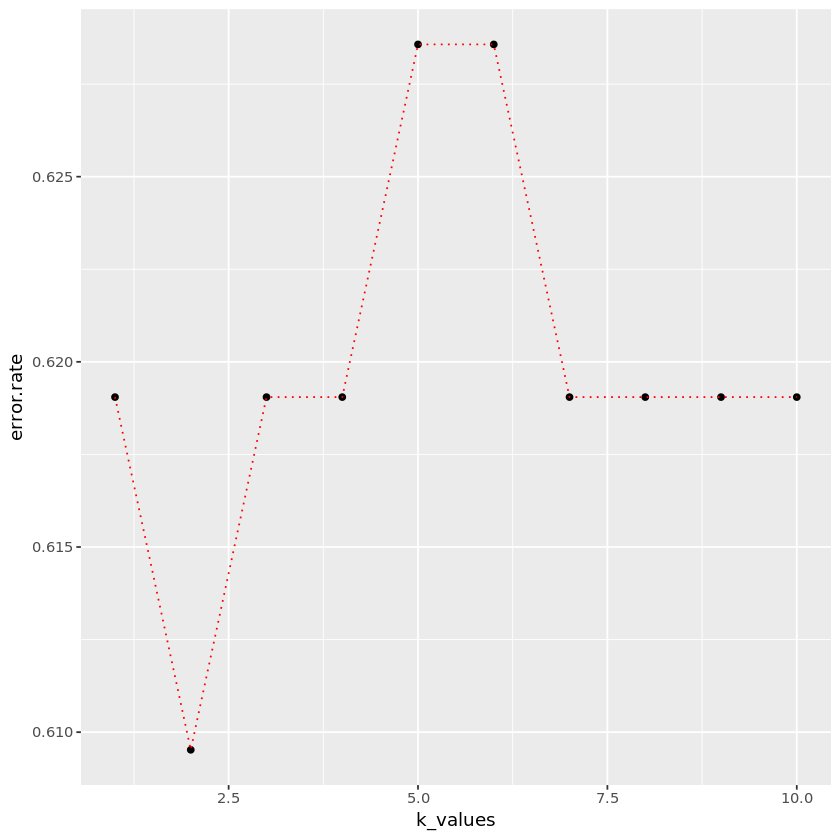

In [19]:
#building plot of error rate and correspoonding k value
library(ggplot2)
k_values <- 1:10
error.df <- data.frame(error.rate,k_values)
print(ggplot(error.df,aes(x=k_values,y=error.rate)) + geom_point()+ geom_line(lty="dotted",color='red'))